# Capstone 2 - Baseball Stat Projections - Data Wrangling

In [2494]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [2495]:
path = "/Users/joeboardman/Documents/Springboard/Capstone 2/data/"
save_path = "/Users/joeboardman/Documents/Springboard/Capstone 2/"
print(path)

/Users/joeboardman/Documents/Springboard/Capstone 2/data/


In [2496]:
#import csv files as dataframes with batting statistics and player information
os.chdir(path)
df = pd.read_csv('batting.csv')
df_player = pd.read_csv('player.csv')
df_salaries = pd.read_csv('salaries.csv')
df_position = pd.read_csv('appearances.csv')
df_allstar = pd.read_csv('all_star.csv')

In [2497]:
df_allstar = df_allstar[['player_id', 'year', 'gp']]
df_allstar = df_allstar.fillna(0)
df_allstar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5069 entries, 0 to 5068
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  5069 non-null   object 
 1   year       5069 non-null   int64  
 2   gp         5069 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 118.9+ KB


In [2498]:
#manipulate df_position so that it gives primary position per player, per year
print(df_position.shape)
df_position = df_position.iloc[:,[0,3,8,9,10,11,12,13,14,15,16,17,18]]
df_position['g_dh'] = df_position['g_dh'].fillna(0)
print(df_position.shape)

(100951, 21)
(100951, 13)


In [2499]:
#remove duplicate years from position csv
df_position = df_position.groupby(['player_id', 'year']).sum().reset_index()
df_position

,player_id,year,g_p,g_c,g_1b,g_2b,g_3b,g_ss,g_lf,g_cf,g_rf,g_of,g_dh
0,aardsda01,2004,11,0,0,0,0,0,0,0,0,0,0.0
1,aardsda01,2006,45,0,0,0,0,0,0,0,0,0,0.0
2,aardsda01,2007,25,0,0,0,0,0,0,0,0,0,0.0
3,aardsda01,2008,47,0,0,0,0,0,0,0,0,0,0.0
4,aardsda01,2009,73,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93897,zwilldu01,1910,0,0,0,0,0,0,0,27,0,27,0.0
93898,zwilldu01,1914,0,0,0,0,0,0,0,153,1,154,0.0
93899,zwilldu01,1915,0,0,3,0,0,0,0,148,0,148,0.0
93900,zwilldu01,1916,0,0,0,0,0,0,0,5,4,10,0.0


In [2500]:
#combine records where a player played for multiple teams into one record
df = df.groupby(['player_id', 'year']).sum().reset_index()
print(df.head())

   player_id  year  stint   g   ab    r    h  double  triple   hr  rbi   sb  \
0  aardsda01  2004      1  11  0.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   
1  aardsda01  2006      1  45  2.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   
2  aardsda01  2007      1  25  0.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   
3  aardsda01  2008      1  47  1.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   
4  aardsda01  2009      1  73  0.0  0.0  0.0     0.0     0.0  0.0  0.0  0.0   

    cs   bb   so  ibb  hbp   sh   sf  g_idp  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0    0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
3  0.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  


In [2501]:
#merge batting and position csvs to avoid duplicate rows
df = pd.merge(df, df_position, on=['player_id', 'year'])

In [2502]:
df_yr_stats = df.groupby('year')[['h', 'bb', 'hbp', 'ab', 'double', 'triple', 'hr', 'sf']].sum()
df_yr_stats['obp_lg'] = (df_yr_stats['h'] + df_yr_stats['bb'] + df_yr_stats['hbp']) / (df_yr_stats['ab'] + df_yr_stats['bb'] + df_yr_stats['hbp'] + df_yr_stats['sf'])
df_yr_stats['slg_lg'] = ((df_yr_stats['h'] - (df_yr_stats['double'] + df_yr_stats['triple'] + df_yr_stats['hr'])) + (df_yr_stats['double'] * 2) + (df_yr_stats['triple'] * 3) + (df_yr_stats['hr'] * 4)) / df_yr_stats['ab']
df_yr_stats['ops_lg'] = df_yr_stats['obp_lg'] + df_yr_stats['slg_lg']
df_yr_stats.tail(31).round(3)
df_yr_stats = df_yr_stats['ops_lg']


In [2503]:
#merge dataframe to bring in player details, salaries etc.
#filter out seasons before 1985, anybody with fewer than 200 ab
df = pd.merge(df, df_player, on='player_id')
df = pd.merge(df, df_salaries, on=['player_id', 'year'])
df = df[df['year'] >= 1985]
df = df[df['ab'] >= 200]

col_list = ['g_c','g_1b','g_2b','g_3b','g_ss','g_lf','g_cf','g_rf','g_of','g_dh',]

     player_id  year  stint    g     ab      r      h  double  triple    hr  \
15   abbotje01  1998      1   89  244.0   33.0   68.0    14.0     1.0  12.0   
17   abbotje01  2000      1   80  215.0   31.0   59.0    15.0     1.0   3.0   
29   abbotku01  1994      1  101  345.0   41.0   86.0    17.0     3.0   9.0   
30   abbotku01  1995      1  120  420.0   60.0  107.0    18.0     7.0  17.0   
31   abbotku01  1996      1  109  320.0   37.0   81.0    18.0     7.0   8.0   
32   abbotku01  1997      1   94  252.0   35.0   69.0    18.0     2.0   6.0   
34   abbotku01  1999      1   96  286.0   41.0   78.0    17.0     2.0   8.0   
46   abercre01  2006      1  111  255.0   39.0   54.0    12.0     2.0   5.0   
47   abernbr01  2002      1  117  463.0   46.0  112.0    18.0     4.0   2.0   
52   abnersh01  1991      3   94  216.0   27.0   42.0    10.0     2.0   3.0   
53   abnersh01  1992      1   97  208.0   21.0   58.0    10.0     1.0   1.0   
55   abreubo01  1998      1  151  497.0   68.0  155.

In [2504]:
#Create datetime column with birthday to be able to calculate age
df['birth_date'] = pd.to_datetime((df.birth_year*10000+df.birth_month*100+df.birth_day).apply(str),format='%Y%m%d')

In [2505]:
#calculate season number in a player's career and age
df['season'] = (df['year'] - pd.DatetimeIndex(df['debut']).year) + 1
df['age'] = (df['year'] - pd.DatetimeIndex(df['birth_date']).year)

    player_id  year  stint    g     ab     r      h  double  triple    hr  \
15  abbotje01  1998      1   89  244.0  33.0   68.0    14.0     1.0  12.0   
17  abbotje01  2000      1   80  215.0  31.0   59.0    15.0     1.0   3.0   
29  abbotku01  1994      1  101  345.0  41.0   86.0    17.0     3.0   9.0   
30  abbotku01  1995      1  120  420.0  60.0  107.0    18.0     7.0  17.0   
31  abbotku01  1996      1  109  320.0  37.0   81.0    18.0     7.0   8.0   

    ...       debut  final_game  retro_id   bbref_id  team_id  league_id  \
15  ...  1997-06-10  2001-09-29  abboj002  abbotje01      CHA         AL   
17  ...  1997-06-10  2001-09-29  abboj002  abbotje01      CHA         AL   
29  ...  1993-09-07  2001-04-13  abbok002  abbotku01      FLO         NL   
30  ...  1993-09-07  2001-04-13  abbok002  abbotku01      FLO         NL   
31  ...  1993-09-07  2001-04-13  abbok002  abbotku01      FLO         NL   

    salary  birth_date  season  age  
15  175000  1972-08-17       2   26  
17  

In [2506]:
#calculate OPS, # of XBH
df['obp'] = (df['h'] + df['bb'] + df['hbp']) / (df['ab'] + df['bb'] + df['hbp'])
df['slg'] = ((df['h'] - (df['double'] + df['triple'] + df['hr'])) + (df['double'] * 2) + (df['triple'] * 3) + (df['hr'] * 4)) / df['ab']
df['ops'] = round((df['obp'] + df['slg']),3)

    player_id  year  stint    g     ab     r      h  double  triple    hr  \
15  abbotje01  1998      1   89  244.0  33.0   68.0    14.0     1.0  12.0   
17  abbotje01  2000      1   80  215.0  31.0   59.0    15.0     1.0   3.0   
29  abbotku01  1994      1  101  345.0  41.0   86.0    17.0     3.0   9.0   
30  abbotku01  1995      1  120  420.0  60.0  107.0    18.0     7.0  17.0   
31  abbotku01  1996      1  109  320.0  37.0   81.0    18.0     7.0   8.0   

    ...   bbref_id  team_id  league_id  salary  birth_date  season  age  \
15  ...  abbotje01      CHA         AL  175000  1972-08-17       2   26   
17  ...  abbotje01      CHA         AL  255000  1972-08-17       4   28   
29  ...  abbotku01      FLO         NL  109000  1969-06-02       2   25   
30  ...  abbotku01      FLO         NL  119000  1969-06-02       3   26   
31  ...  abbotku01      FLO         NL  250000  1969-06-02       4   27   

         obp       slg    ops  
15  0.304348  0.491803  0.796  
17  0.344538  0.395349

In [2507]:
#Delete unnecessary columns
df = df.drop(df.columns[[2,20,26,27,28,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,57]], axis=1)


,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,g_3b,g_ss,g_of,g_dh,salary,season,age,obp,slg,ops
15,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,0,0,76,0.0,175000,2,26,0.304348,0.491803,0.796
17,abbotje01,2000,80,215.0,31.0,59.0,15.0,1.0,3.0,29.0,...,0,0,65,2.0,255000,4,28,0.344538,0.395349,0.740
29,abbotku01,1994,101,345.0,41.0,86.0,17.0,3.0,9.0,33.0,...,0,99,0,0.0,109000,2,25,0.292350,0.394203,0.687
30,abbotku01,1995,120,420.0,60.0,107.0,18.0,7.0,17.0,60.0,...,0,115,0,0.0,119000,3,26,0.321041,0.452381,0.773
31,abbotku01,1996,109,320.0,37.0,81.0,18.0,7.0,8.0,33.0,...,33,44,0,0.0,250000,4,27,0.307246,0.428125,0.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24767,zobribe01,2015,126,467.0,76.0,129.0,36.0,3.0,13.0,56.0,...,4,0,49,6.0,7500000,10,34,0.362264,0.449679,0.812
24776,zuninmi01,2014,131,438.0,51.0,87.0,20.0,2.0,22.0,60.0,...,0,0,0,1.0,504100,2,23,0.256356,0.404110,0.660
24777,zuninmi01,2015,112,350.0,28.0,61.0,11.0,0.0,11.0,28.0,...,0,0,0,0.0,523500,3,24,0.231383,0.300000,0.531
24779,zupcibo01,1992,124,392.0,46.0,108.0,19.0,1.0,3.0,43.0,...,0,0,114,0.0,109000,2,26,0.325416,0.352041,0.677


In [2508]:
#df = df.merge(df_allstar, how='left', left_on=('player_id', 'year'), right_on=('player_id', 'year'))
df = df.merge(df_allstar, how='left', on=('player_id', 'year'))
df['gp'] = df['gp'].fillna(0)
df.rename(columns={'gp':'allstar'}, inplace=True)

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,g_ss,g_of,g_dh,salary,season,age,obp,slg,ops,allstar
0,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,0,76,0.0,175000,2,26,0.304348,0.491803,0.796,0.0
1,abbotje01,2000,80,215.0,31.0,59.0,15.0,1.0,3.0,29.0,...,0,65,2.0,255000,4,28,0.344538,0.395349,0.740,0.0
2,abbotku01,1994,101,345.0,41.0,86.0,17.0,3.0,9.0,33.0,...,99,0,0.0,109000,2,25,0.292350,0.394203,0.687,0.0
3,abbotku01,1995,120,420.0,60.0,107.0,18.0,7.0,17.0,60.0,...,115,0,0.0,119000,3,26,0.321041,0.452381,0.773,0.0
4,abbotku01,1996,109,320.0,37.0,81.0,18.0,7.0,8.0,33.0,...,44,0,0.0,250000,4,27,0.307246,0.428125,0.735,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9107,zobribe01,2015,126,467.0,76.0,129.0,36.0,3.0,13.0,56.0,...,0,49,6.0,7500000,10,34,0.362264,0.449679,0.812,0.0
9108,zuninmi01,2014,131,438.0,51.0,87.0,20.0,2.0,22.0,60.0,...,0,0,1.0,504100,2,23,0.256356,0.404110,0.660,0.0
9109,zuninmi01,2015,112,350.0,28.0,61.0,11.0,0.0,11.0,28.0,...,0,0,0.0,523500,3,24,0.231383,0.300000,0.531,0.0
9110,zupcibo01,1992,124,392.0,46.0,108.0,19.0,1.0,3.0,43.0,...,0,114,0.0,109000,2,26,0.325416,0.352041,0.677,0.0


In [2509]:
#Fill NaN values in 'obp', 'slg', 'ops' columns with zeros because the errors are driven by a player 
#having 0 at bats for a season
dftest1 = df[df['obp'].isna()]
print(dftest1.head())
df['obp'] = df['obp'].fillna(0)
df['slg'] = df['slg'].fillna(0)
df['ops'] = df['ops'].fillna(0)


Empty DataFrame
Columns: [player_id, year, g, ab, r, h, double, triple, hr, rbi, sb, cs, bb, so, ibb, hbp, sh, sf, g_idp, g_c, g_1b, g_2b, g_3b, g_ss, g_of, g_dh, salary, season, age, obp, slg, ops, allstar]
Index: []

[0 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9112 entries, 0 to 9111
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  9112 non-null   object 
 1   year       9112 non-null   int64  
 2   g          9112 non-null   int64  
 3   ab         9112 non-null   float64
 4   r          9112 non-null   float64
 5   h          9112 non-null   float64
 6   double     9112 non-null   float64
 7   triple     9112 non-null   float64
 8   hr         9112 non-null   float64
 9   rbi        9112 non-null   float64
 10  sb         9112 non-null   float64
 11  cs         9112 non-null   float64
 12  bb         9112 non-null   float64
 13  so         9112 non-null   float64
 14  ibb    

In [2510]:
#check for duplicates
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,g_ss,g_of,g_dh,salary,season,age,obp,slg,ops,allstar
8047,tatisfe01,1998,150,532.0,69.0,147.0,33.0,4.0,11.0,58.0,...,3,0,0.0,170000,2,23,0.329268,0.415414,0.745,0.0


In [2511]:
#Drop Duplicates
df.drop_duplicates(keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9111 entries, 0 to 9111
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  9111 non-null   object 
 1   year       9111 non-null   int64  
 2   g          9111 non-null   int64  
 3   ab         9111 non-null   float64
 4   r          9111 non-null   float64
 5   h          9111 non-null   float64
 6   double     9111 non-null   float64
 7   triple     9111 non-null   float64
 8   hr         9111 non-null   float64
 9   rbi        9111 non-null   float64
 10  sb         9111 non-null   float64
 11  cs         9111 non-null   float64
 12  bb         9111 non-null   float64
 13  so         9111 non-null   float64
 14  ibb        9111 non-null   float64
 15  hbp        9111 non-null   float64
 16  sh         9111 non-null   float64
 17  sf         9111 non-null   float64
 18  g_idp      9111 non-null   float64
 19  g_c        9111 non-null   int64  
 20  g_1b    

# Feature Engineering - Add Useful Features before modeling

In [2512]:
# Create New Features - OPS vs league avg
df = df.merge(df_yr_stats, on='year')
df['ops_vs_lg_avg'] = df.ops - df.ops_lg

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,g_dh,salary,season,age,obp,slg,ops,allstar,ops_lg,ops_vs_lg_avg
0,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,0.0,175000,2,26,0.304348,0.491803,0.796,0.0,0.755338,0.040662
1,abreubo01,1998,151,497.0,68.0,155.0,29.0,6.0,17.0,74.0,...,0.0,180000,3,24,0.411360,0.496982,0.908,0.0,0.755338,0.152662
2,alexama02,1998,108,264.0,34.0,60.0,10.0,1.0,5.0,25.0,...,2.0,425000,7,27,0.279152,0.329545,0.609,0.0,0.755338,-0.146338
3,alfoned01,1998,144,557.0,94.0,155.0,28.0,2.0,17.0,78.0,...,0.0,1750000,4,25,0.356800,0.427289,0.784,0.0,0.755338,0.028662
4,alicelu01,1998,101,259.0,51.0,71.0,15.0,3.0,6.0,33.0,...,7.0,750000,11,33,0.375415,0.424710,0.800,0.0,0.755338,0.044662


In [2513]:
# Create new features - avg ops for age/yr of career - need to create -1, -2, -3 features against lg avg
df_season_ops = df.groupby('season')[['ops']].mean()
df_season_ops['season_ops'] = df_season_ops['ops']
df_season_ops.drop('ops', axis=1, inplace=True)
df = df.merge(df_season_ops, on='season')
df['ops_vs_season_avg'] = df.ops - df.season_ops
df = df.sort_values(['player_id', 'year']).reset_index(drop=True)


,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,season,age,obp,slg,ops,allstar,ops_lg,ops_vs_lg_avg,season_ops,ops_vs_season_avg
0,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,2,26,0.304348,0.491803,0.796,0.0,0.755338,0.040662,0.730523,0.065477
1,abbotje01,2000,80,215.0,31.0,59.0,15.0,1.0,3.0,29.0,...,4,28,0.344538,0.395349,0.740,0.0,0.782061,-0.042061,0.755118,-0.015118
2,abbotku01,1994,101,345.0,41.0,86.0,17.0,3.0,9.0,33.0,...,2,25,0.292350,0.394203,0.687,0.0,0.763021,-0.076021,0.730523,-0.043523
3,abbotku01,1995,120,420.0,60.0,107.0,18.0,7.0,17.0,60.0,...,3,26,0.321041,0.452381,0.773,0.0,0.755129,0.017871,0.740857,0.032143
4,abbotku01,1996,109,320.0,37.0,81.0,18.0,7.0,8.0,33.0,...,4,27,0.307246,0.428125,0.735,0.0,0.767128,-0.032128,0.755118,-0.020118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106,zobribe01,2015,126,467.0,76.0,129.0,36.0,3.0,13.0,56.0,...,10,34,0.362264,0.449679,0.812,0.0,0.721370,0.090630,0.762830,0.049170
9107,zuninmi01,2014,131,438.0,51.0,87.0,20.0,2.0,22.0,60.0,...,2,23,0.256356,0.404110,0.660,0.0,0.700275,-0.040275,0.730523,-0.070523
9108,zuninmi01,2015,112,350.0,28.0,61.0,11.0,0.0,11.0,28.0,...,3,24,0.231383,0.300000,0.531,0.0,0.721370,-0.190370,0.740857,-0.209857
9109,zupcibo01,1992,124,392.0,46.0,108.0,19.0,1.0,3.0,43.0,...,2,26,0.325416,0.352041,0.677,0.0,0.699629,-0.022629,0.730523,-0.053523


In [2514]:
# Create New Features - More advanced stat calcs - wOBA, wRAA
df['player_wOBA'] = ((0.69 * (df.bb - df.ibb)) + (0.719 * df.hbp) + (0.87 * (df.h - (df.double + df.triple + df.hr))) + (1.217 * df.double) + (1.529 * df.triple) + (1.94 * df.hr)) / (df.ab + df.bb - df.ibb + df.hbp + df.sf)
df = df.dropna()


In [2515]:
# Create New Features - More advanced stat calcs - wOBA, wRAA
df_fgsabr = pd.read_csv('FanGraphs_Leaderboard.csv')
df_fgsabr = df_fgsabr[['Season', 'wOBA', 'wOBAScale']]
df = df.merge(df_fgsabr, left_on='year', right_on='Season')
df.rename(columns={'Season':'wOBA_year', 'wOBA': 'lg_wOBA', 'wOBAScale':'lg_wOBAScale'}, inplace=True)
df['pa'] = df.ab + df.bb + df.sh + df.sf + df.hbp
df['wRAA'] = ((df.player_wOBA - df.lg_wOBA) / df.lg_wOBAScale) * df.pa

In [2516]:
# Create New Features - Add ratios

df['BABIP'] = (df.h - df.hr) / (df.ab - df.so - df.hr + df.sf)
df['avg'] = df.h / df.ab
df['bb%'] = df.bb / df.pa
df['k%'] = df.so / df.pa
df['XBA%'] = (df.double + df.triple + df.hr) / df.h
df['hr%'] = df.hr / df.h
df['iso'] = df['slg'] - df['avg']

df = df.drop(['obp', 'slg', 'pa', 'wOBA_year'], axis=1)


,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,lg_wOBA,lg_wOBAScale,wRAA,BABIP,avg,bb%,k%,XBA%,hr%,iso
0,abbotje01,1998,89,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,0.331,1.197,-1.715703,0.267943,0.278689,0.034615,0.107692,0.397059,0.176471,0.213115
1,abreubo01,1998,151,497.0,68.0,155.0,29.0,6.0,17.0,74.0,...,0.331,1.197,22.712479,0.393162,0.311871,0.142615,0.225806,0.335484,0.109677,0.185111
2,alexama02,1998,108,264.0,34.0,60.0,10.0,1.0,5.0,25.0,...,0.331,1.197,-16.674504,0.283505,0.227273,0.062284,0.228374,0.266667,0.083333,0.102273
3,alfoned01,1998,144,557.0,94.0,155.0,28.0,2.0,17.0,78.0,...,0.331,1.197,2.395702,0.296137,0.278276,0.103175,0.122222,0.303226,0.109677,0.149013
4,alicelu01,1998,101,259.0,51.0,71.0,15.0,3.0,6.0,33.0,...,0.331,1.197,3.278163,0.300926,0.274131,0.120130,0.129870,0.338028,0.084507,0.150579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106,wilsowi02,1990,115,307.0,49.0,89.0,13.0,3.0,2.0,42.0,...,0.319,1.299,-0.991480,0.346614,0.289902,0.086957,0.165217,0.202247,0.022472,0.081433
9107,winfida01,1990,132,475.0,70.0,127.0,21.0,2.0,21.0,78.0,...,0.319,1.299,5.263223,0.278947,0.267368,0.096834,0.150838,0.346457,0.165354,0.185263
9108,worthcr01,1990,133,425.0,46.0,96.0,17.0,0.0,8.0,44.0,...,0.319,1.299,-11.540650,0.271605,0.225882,0.125749,0.191617,0.260417,0.083333,0.096471
9109,yountro01,1990,158,587.0,98.0,145.0,17.0,5.0,17.0,77.0,...,0.319,1.299,-5.593052,0.261759,0.247019,0.114202,0.130307,0.268966,0.117241,0.132879


In [2517]:
# Create New Features - shift stats to prior years so model cant use current year stats to predict
# current year OPS
import time
start_time = time.time()

df = df.sort_values(['player_id', 'year']).reset_index(drop=True)

#1-year shift
df['ops_1'] = df.groupby('player_id')['ops'].shift()
df['hr_1'] = df.groupby('player_id')['hr'].shift(fill_value=0)
df['ops_vs_lg_avg_1'] = df.groupby('player_id')['ops_vs_lg_avg'].shift(fill_value=0)
df['so_1'] = df.groupby('player_id')['so'].shift(fill_value=0)
df['ab_1'] = df.groupby('player_id')['ab'].shift(fill_value=0)
df['sb_1'] = df.groupby('player_id')['sb'].shift(fill_value=0)
df['ops_vs_season_avg_1'] = df.groupby('player_id')['ops_vs_season_avg'].shift(fill_value=0)
df['avg_1'] = df.groupby('player_id')['avg'].shift(fill_value=0)
df['bb%_1'] = df.groupby('player_id')['bb%'].shift(fill_value=0)
df['k%_1'] = df.groupby('player_id')['k%'].shift(fill_value=0)
df['XBA%_1'] = df.groupby('player_id')['XBA%'].shift(fill_value=0)
df['hr%_1'] = df.groupby('player_id')['hr%'].shift(fill_value=0)
df['iso_1'] = df.groupby('player_id')['iso'].shift(fill_value=0)
df['g_c_1'] = df.groupby('player_id')['g_c'].shift(fill_value=0)
df['g_1b_1'] = df.groupby('player_id')['g_1b'].shift(fill_value=0)
df['g_2b_1'] = df.groupby('player_id')['g_2b'].shift(fill_value=0)
df['g_ss_1'] = df.groupby('player_id')['g_ss'].shift(fill_value=0)
df['g_3b_1'] = df.groupby('player_id')['g_3b'].shift(fill_value=0)
df['g_of_1'] = df.groupby('player_id')['g_of'].shift(fill_value=0)
df['g_dh_1'] = df.groupby('player_id')['g_dh'].shift(fill_value=0)
df['wRAA_1'] = df.groupby('player_id')['wRAA'].shift(fill_value=0)
df['BABIP_1'] = df.groupby('player_id')['BABIP'].shift(fill_value=0)
df['allstar_1'] = df.groupby('player_id')['allstar'].shift(fill_value=0)

# 2-year shift
df['ops_2'] = df.groupby('player_id')['ops'].shift(periods=2)
df['hr_2'] = df.groupby('player_id')['hr'].shift(periods=2, fill_value=0)
df['ops_vs_lg_avg_2'] = df.groupby('player_id')['ops_vs_lg_avg'].shift(periods=2, fill_value=0)
df['ab_2'] = df.groupby('player_id')['ab'].shift(periods=2, fill_value=0)
df['sb_2'] = df.groupby('player_id')['sb'].shift(periods=2, fill_value=0)
df['ops_vs_season_avg_2'] = df.groupby('player_id')['ops_vs_season_avg'].shift(periods=2, fill_value=0)
df['avg_2'] = df.groupby('player_id')['avg'].shift(periods=2, fill_value=0)
df['bb%_2'] = df.groupby('player_id')['bb%'].shift(periods=2, fill_value=0)
df['k%_2'] = df.groupby('player_id')['k%'].shift(periods=2, fill_value=0)
df['XBA%_2'] = df.groupby('player_id')['XBA%'].shift(periods=2, fill_value=0)
df['hr%_2'] = df.groupby('player_id')['hr%'].shift(periods=2, fill_value=0)
df['iso_2'] = df.groupby('player_id')['iso'].shift(periods=2, fill_value=0)
df['wRAA_2'] = df.groupby('player_id')['wRAA'].shift(periods=2, fill_value=0)
df['BABIP_2'] = df.groupby('player_id')['BABIP'].shift(periods=2, fill_value=0)
df['g_c_2'] = df.groupby('player_id')['g_c'].shift(periods=2, fill_value=0)
df['g_1b_2'] = df.groupby('player_id')['g_1b'].shift(periods=2, fill_value=0)
df['g_2b_2'] = df.groupby('player_id')['g_2b'].shift(periods=2, fill_value=0)
df['g_ss_2'] = df.groupby('player_id')['g_ss'].shift(periods=2, fill_value=0)
df['g_3b_2'] = df.groupby('player_id')['g_3b'].shift(periods=2, fill_value=0)
df['g_of_2'] = df.groupby('player_id')['g_of'].shift(periods=2, fill_value=0)
df['g_dh_2'] = df.groupby('player_id')['g_dh'].shift(periods=2, fill_value=0)
df['allstar_2'] = df.groupby('player_id')['allstar'].shift(periods=2, fill_value=0)

end_time = time.time()
total_time = end_time - start_time
print('Run time:',total_time, 'seconds')

df.dropna(inplace=True)

Run time: 16.883089065551758 seconds


In [2518]:
# Create New Features - Average over previous 2 seasons
df['ops_prev_2'] = (df.ops_1 + df.ops_2) / 2
df['bb%_prev_2'] = (df['bb%_1'] + df['bb%_2']) / 2
df['k%_prev_2'] = (df['k%_1'] + df['k%_2']) / 2
df['XBA%_prev_2'] = (df['XBA%_1'] + df['XBA%_2']) / 2
df['ab_prev_2'] = (df.ab_1 + df.ab_2) / 2
df['avg_prev_2'] = (df.avg_1 + df.avg_2) / 2
df['BABIP_prev_2'] = (df.BABIP_1 + df.BABIP_2) / 2
df['hr_prev_2'] = (df.hr_1 + df.hr_2) / 2
df['sb_prev_2'] = (df.sb_1 + df.sb_2) / 2
df['g_c_prev_2'] = (df.g_c_1 + df.g_c_2) / 2
df['g_1b_prev_2'] = (df.g_1b_1 + df.g_1b_2) / 2
df['g_2b_prev_2'] = (df.g_2b_1 + df.g_2b_2) / 2
df['g_3b_prev_2'] = (df.g_3b_1 + df.g_3b_2) / 2
df['g_ss_prev_2'] = (df.g_ss_1 + df.g_ss_2) / 2
df['g_of_prev_2'] = (df.g_of_1 + df.g_of_2) / 2
df['g_dh_prev_2'] = (df.g_dh_1 + df.g_dh_2) / 2

In [2519]:
# add categorical features for power hitter, speed guy, contact hitter
df['power'] = np.where(df.hr_prev_2 >= 30, 1, 0)
df['speed'] = np.where(df.sb_prev_2 >= 30, 1, 0)
df['contact'] = np.where(df.avg_prev_2 >= 0.3, 1, 0)
df['lucky_1'] = np.where((df.BABIP_1 - df.avg_1) > 0.07, 1, 0)
df['lucky_2'] = np.where((df.BABIP_2 - df.avg_2) > 0.07, 1, 0)

In [2520]:
df.lucky_1.value_counts()

0    5924
1     138
Name: lucky_1, dtype: int64

In [2521]:
# drop features from last season and season before and only include average of previous 2
df.drop(['ops_vs_lg_avg_1', 'ab_1', 'ops_vs_season_avg_1', 'avg_1', 'bb%_1', 'k%_1', 'XBA%_1',
        'hr%_1', 'iso_1', 'g_c_1', 'g_1b_1', 'g_2b_1', 'g_3b_1', 'g_ss_1', 'g_of_1', 'g_dh_1', 'wRAA_1', 
        'BABIP_1', 'ops_vs_lg_avg_2', 'ab_2', 'ops_vs_season_avg_2', 'avg_2', 'bb%_2', 'k%_2', 
         'XBA%_2', 'hr%_2', 'iso_2', 'g_c_2', 'g_1b_2', 'g_2b_2', 'g_3b_2', 'g_ss_2', 'g_of_2', 'g_dh_2', 
         'wRAA_2', 'BABIP_2', 'hr_1', 'hr_2', 'sb_1', 'sb_2'], axis=1, inplace=True)

In [2522]:
#count unique values for each column
for column in df.columns:
    vals = df[column].nunique()
    print(column, vals)

player_id 1136
year 30
g 111
ab 490
r 135
h 195
double 57
triple 21
hr 64
rbi 147
sb 75
cs 28
bb 142
so 187
ibb 42
hbp 32
sh 25
sf 18
g_idp 33
g_c 118
g_1b 162
g_2b 163
g_3b 163
g_ss 158
g_of 163
g_dh 145
salary 1371
season 22
age 25
ops 588
allstar 2
ops_lg 30
ops_vs_lg_avg 4578
season_ops 22
ops_vs_season_avg 3594
player_wOBA 6039
lg_wOBA 21
lg_wOBAScale 27
wRAA 6040
BABIP 4049
avg 4385
bb% 4763
k% 5111
XBA% 2619
hr% 2257
iso 5426
ops_1 580
so_1 186
allstar_1 2
ops_2 573
allstar_2 2
ops_prev_2 1197
bb%_prev_2 6059
k%_prev_2 6059
XBA%_prev_2 6006
ab_prev_2 901
avg_prev_2 6057
BABIP_prev_2 6052
hr_prev_2 112
sb_prev_2 137
g_c_prev_2 209
g_1b_prev_2 310
g_2b_prev_2 312
g_3b_prev_2 310
g_ss_prev_2 303
g_of_prev_2 324
g_dh_prev_2 221
power 2
speed 2
contact 2
lucky_1 2
lucky_2 2


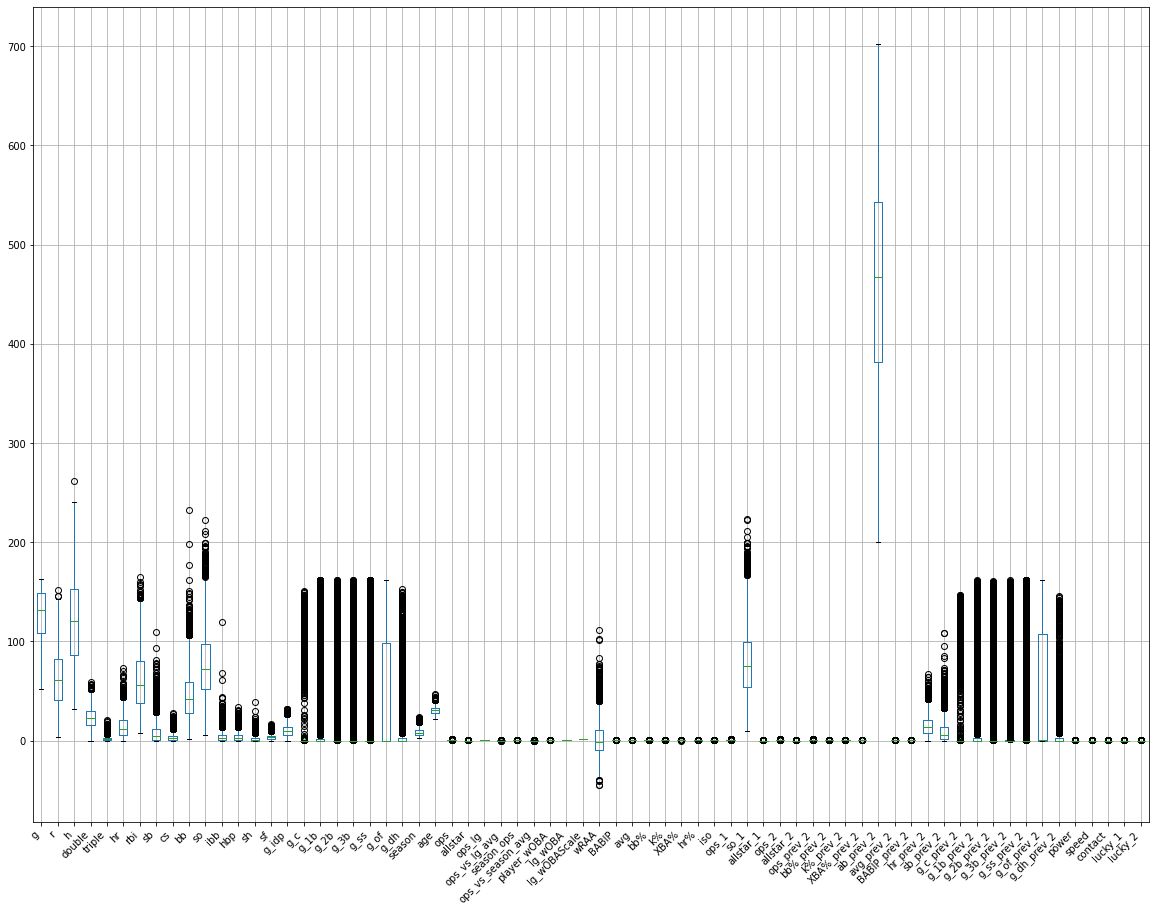

In [2523]:
#Check for outliers
df_bp = df.drop(['salary', 'year','ab'], axis=1)
df_bp.boxplot(figsize=(20, 15), rot=45)
plt.xticks(rotation=45, ha='right')
plt.show()

In [2524]:
df.reset_index(inplace=True, drop=True)
df

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,g_2b_prev_2,g_3b_prev_2,g_ss_prev_2,g_of_prev_2,g_dh_prev_2,power,speed,contact,lucky_1,lucky_2
0,abbotku01,1996,109,320.0,37.0,81.0,18.0,7.0,8.0,33.0,...,0.0,0.0,107.0,0.0,0.0,0,0,0,0,1
1,abbotku01,1997,94,252.0,35.0,69.0,18.0,2.0,6.0,30.0,...,10.0,16.5,79.5,0.0,0.0,0,0,0,1,0
2,abbotku01,1999,96,286.0,41.0,78.0,17.0,2.0,8.0,41.0,...,37.0,18.5,25.5,5.0,0.0,0,0,0,1,1
3,abreubo01,2000,154,576.0,103.0,182.0,42.0,10.0,25.0,79.0,...,0.0,0.0,0.0,146.0,2.5,0,0,1,0,1
4,abreubo01,2001,162,588.0,118.0,170.0,48.0,4.0,31.0,110.0,...,0.0,0.0,0.0,149.0,2.5,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6057,zobribe01,2011,156,588.0,99.0,158.0,46.0,6.0,20.0,91.0,...,73.5,1.5,6.5,90.0,0.5,0,0,0,0,0
6058,zobribe01,2012,157,560.0,88.0,151.0,39.0,7.0,20.0,74.0,...,93.5,1.0,0.0,74.0,1.5,0,0,0,0,0
6059,zobribe01,2013,157,612.0,77.0,168.0,36.0,3.0,12.0,71.0,...,94.5,0.0,23.5,54.5,3.5,0,0,0,0,0
6060,zobribe01,2014,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,...,91.5,0.0,34.0,56.5,3.0,0,0,0,0,0


In [2525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6062 entries, 0 to 6061
Data columns (total 72 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          6062 non-null   object 
 1   year               6062 non-null   int64  
 2   g                  6062 non-null   int64  
 3   ab                 6062 non-null   float64
 4   r                  6062 non-null   float64
 5   h                  6062 non-null   float64
 6   double             6062 non-null   float64
 7   triple             6062 non-null   float64
 8   hr                 6062 non-null   float64
 9   rbi                6062 non-null   float64
 10  sb                 6062 non-null   float64
 11  cs                 6062 non-null   float64
 12  bb                 6062 non-null   float64
 13  so                 6062 non-null   float64
 14  ibb                6062 non-null   float64
 15  hbp                6062 non-null   float64
 16  sh                 6062 

In [2526]:
# Write your dataframe to csv 

save = os.path.join(save_path, 'data', 'Baseball_DW.csv')
df.to_csv(save)